In [ ]:
#https://github.com/rajtilakls2510/car_price_predictor/blob/master/quikr_car.csv

In [1]:
# import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for intractivity
from ipywidgets import interact

In [2]:
# loading dataset
df = pd.read_excel('incident2.xlsx')
df

,Product,Business object,Issue,Solution
0,C4C,Sales quote,submit disabled,2629811 - Action Submit is Disabled For Sales ...
1,C4C,Sales quote,price,2940435 - Product Price Missing From Sales Quote
2,C4C,Sales quote,copy,3076907 - Can't Copy CPQ Quotes
3,C5C,Sales Order,offline,3096406 - Sales Order is Not Editable in Offli...
4,C5C,Sales Order,pricing,2665647 - Pricing Component Field In Sales Order


In [3]:
df['Business object'].replace('Sales quote','SQ',inplace=True)

In [4]:
df['Business object'].replace('Sales Order','SO',inplace=True)

In [5]:
df['Issue'].replace('submit disabled','sd',inplace=True)

In [6]:
df

,Product,Business object,Issue,Solution
0,C4C,SQ,sd,2629811 - Action Submit is Disabled For Sales ...
1,C4C,SQ,price,2940435 - Product Price Missing From Sales Quote
2,C4C,SQ,copy,3076907 - Can't Copy CPQ Quotes
3,C5C,SO,offline,3096406 - Sales Order is Not Editable in Offli...
4,C5C,SO,pricing,2665647 - Pricing Component Field In Sales Order


In [7]:
df['Solution ']

0    2629811 - Action Submit is Disabled For Sales ...
1    2940435 - Product Price Missing From Sales Quote 
2                      3076907 - Can't Copy CPQ Quotes
3    3096406 - Sales Order is Not Editable in Offli...
4     2665647 - Pricing Component Field In Sales Order
Name: Solution , dtype: object

In [8]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
df['Product']= lb.fit_transform(df['Product'])
df['Business object'] = lb.fit_transform(df['Business object'])
df['Issue'] = lb.fit_transform(df['Issue'])

In [9]:
from sklearn.cluster import KMeans

# removing the label
x = df.drop(['Solution '],axis=1)

x = x.values

print(x.shape)

(5, 3)


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


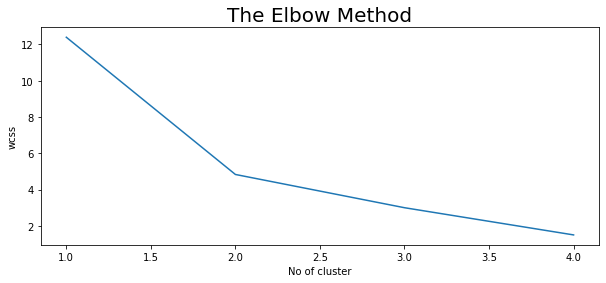

In [10]:
plt.rcParams['figure.figsize']=(10,4)
wcss = []
for i in range(1,5):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=10,n_init=5,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot
plt.plot(range(1,5),wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No of cluster')
plt.ylabel('wcss')
plt.show()

In [11]:
# lets implement the K means algo
km = KMeans(n_clusters=2,init='k-means++',max_iter=10,n_init=5,random_state=0)
y_means = km.fit_predict(x)

# lets find out the results
a = df['Solution ']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means,a],axis=1)
z = z.rename(columns={0:'cluster'})

# lets check the clusters of each solution
print("Lets check the Result after applying the K means \n ")
print("Solution in the First Cluster",z[z['cluster']==0]['Solution '].unique())
print("Solution in the First Cluster",z[z['cluster']==1]['Solution '].unique())

Lets check the Result after applying the K means 
 
Solution in the First Cluster ['2629811 - Action Submit is Disabled For Sales Quote'
 '2940435 - Product Price Missing From Sales Quote '
 '2665647 - Pricing Component Field In Sales Order']
Solution in the First Cluster ["3076907 - Can't Copy CPQ Quotes"
 '3096406 - Sales Order is Not Editable in Offline Mode']


In [12]:
# let split the Dataset for predictive model
y = df['Solution ']
x = df.drop(['Solution '],axis=1)

print("Shape of x:",x.shape)
print("Shape of y:",y.shape)

Shape of x: (5, 3)
Shape of y: (5,)


In [13]:
# lets create Training and Testing sets for validation of results
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


print("The shape of x_train:",x_train.shape)
print("The shape of x_test:",x_test.shape)
print("The shape of y_train:",y_train.shape)
print("The shape of y_test:",y_test.shape)

The shape of x_train: (4, 3)
The shape of x_test: (1, 3)
The shape of y_train: (4,)
The shape of y_test: (1,)


In [14]:
# lets create a predictive model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=3,max_depth=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

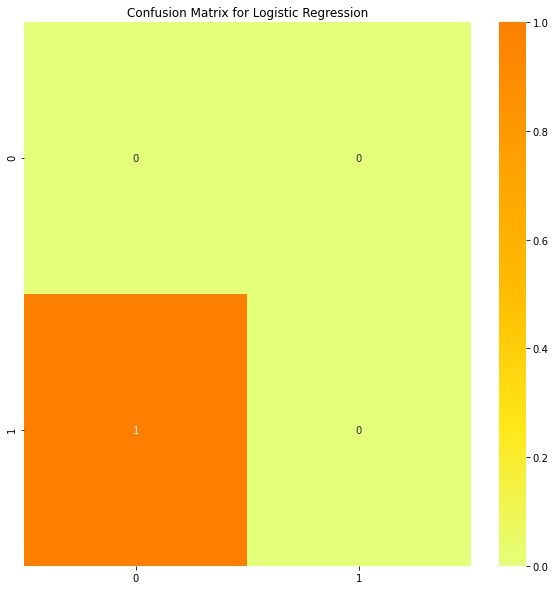

In [15]:
# lets evaluate the model performance
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# lets print the confusion matrix 
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, cmap='Wistia')
plt.title("Confusion Matrix for Logistic Regression",fontsize=12)
plt.show()

In [17]:
cr = classification_report(y_test,y_pred)
print(cr)

                                                   precision    recall  f1-score   support

2940435 - Product Price Missing From Sales Quote        0.00      0.00      0.00       0.0
                  3076907 - Can't Copy CPQ Quotes       0.00      0.00      0.00       1.0

                                         accuracy                           0.00       1.0
                                        macro avg       0.00      0.00      0.00       1.0
                                     weighted avg       0.00      0.00      0.00       1.0



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.

In [18]:
df.head()

,Product,Business object,Issue,Solution
0,0,1,4,2629811 - Action Submit is Disabled For Sales ...
1,0,1,2,2940435 - Product Price Missing From Sales Quote
2,0,1,0,3076907 - Can't Copy CPQ Quotes
3,1,0,1,3096406 - Sales Order is Not Editable in Offli...
4,1,0,3,2665647 - Pricing Component Field In Sales Order


In [21]:
get_sol = model.predict(np.array([[1,
                                 1,
                                 0]]))
print("Solution is:",get_sol)

Solution is: ['3096406 - Sales Order is Not Editable in Offline Mode']


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [13]:
df = pd.read_excel('incidents.xlsx')
df.head()

,Product,Business object,Issue,Solution
0,C4C,Sales quote,submit disabled,2629811 - Action Submit is Disabled For Sales ...
1,C4C,Sales quote,price,2940435 - Product Price Missing From Sales Quote
2,C4C,Sales quote,copy,3076907 - Can't Copy CPQ Quotes
3,C4C,Sales quote,external indicator,2611062 - How Extern Indicator Works in Sales ...
4,C4C,Sales quote,Scoping,2758035 - Scoping Questions - Sales Quotes


In [16]:
df['Business object'].unique()

array(['SalesQuote', 'SalesOrder', 'Opportunity', 'tickets',
       'EmailChannel'], dtype=object)

In [15]:
df['Business object'].replace('Sales quote','SalesQuote',inplace=True)
df['Business object'].replace('Sales Order','SalesOrder',inplace=True)
df['Business object'].replace('Email channel','EmailChannel',inplace=True)

In [18]:
df['Product'].unique()

array(['C4C'], dtype=object)

In [17]:
df['Product'].replace('C4C ','C4C',inplace=True)

In [8]:
df['Issue'].unique()

array(['submit disabled', 'price', 'copy', 'external indicator',
       'Scoping ', 'Preview external quote', 'BTD Reference',
       'New button grayed out', 'status completed', 'Reapproval ',
       'Inbound replication', 'Replication status reset', 'delete quote',
       'XML Payload', 'Pricing facet', 'Delete CPQ', 'offline', 'pricing',
       'Replication S4', 'Item party replication', 'AFS Integration',
       'Partner address ', 'Request date', 'Approval status',
       'Delivery priority', 'edit sales order', 'maintainance mode',
       'offline determination', 'delivery block', 'custom status',
       'Open opportunity from account', 'sales phase', 'replication',
       'trend analytics', 'import status', 'ATP check', 'delete ticket',
       'attachments Odata', 'reply on ticket', 'outbound message',
       'non-active employees', 'attachment replication', 'email bounce',
       'email address sync', 'outbound size ', 'create ticket',
       'debug email', 'incoming email', 'c

In [19]:
df.head()

,Product,Business object,Issue,Solution
0,C4C,SalesQuote,submit disabled,2629811 - Action Submit is Disabled For Sales ...
1,C4C,SalesQuote,price,2940435 - Product Price Missing From Sales Quote
2,C4C,SalesQuote,copy,3076907 - Can't Copy CPQ Quotes
3,C4C,SalesQuote,external indicator,2611062 - How Extern Indicator Works in Sales ...
4,C4C,SalesQuote,Scoping,2758035 - Scoping Questions - Sales Quotes


In [20]:
df.to_csv('incident.csv')